## Analyzing the Stroop Effect

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

In [1]:
### import neccessary packages
import pandas as pd
import numpy as np
from scipy import stats 

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
### upload and view data
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
### basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


### (1) What is the independent variable? What is the dependent variable?

The *independent variable* is the color of the ink used to print the word, the same as the color word or different from the color word. These are encoded as 'Congruent' or 'Incongruent' in our data. 

The *dependent variable* is the time needed by the participant to read the words. 

### (2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The hypothesis to be tested is denoted $H_0$ (the null hypothesis). The research hypothesis is $H_1$ is to be accepted in case that we reject the null hypothesis. 

- *Null Hypothesis*: the mean time in incongruent words condition is no longer, even shorter than the recorded mean time in congruent words condition.

$$H_0:  \mu _{inc} - \mu _{con} \leq 0$$

- *Alternative Hypothesis*: the mean time in incongruent words condition is longer than the mean time in congruent words condition.

$$H_1: \mu _{inc} - \mu _{con} > 0$$

- Test statistic: the function on which the statistical decisions will be made, this is the difference between the time proportions $diff = \mu_{inc} - \mu_{cong}$.

- Rejection region: specifies the values of the test statistic for which the null hypothesis is to be rejected, in favor of the alternative hypothesis. We will work with a $95/%$ confidence interval, which means that the level of the test is $\alpha = 0.05$.

Statistical tests to be performed:

> First we perform a T-test on the sample to check if the data is compatible with our expectations.
    
> Second, we compute the observed difference for the given sample. In order to decide if this difference is statistically significant or just due to chance we perform an A/B test on a simulated sampling distribution.

### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
### basic descriptive statistics for the dataframe
### includes mean, standard deviation and 5 numbers summary

df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

(0, 5)

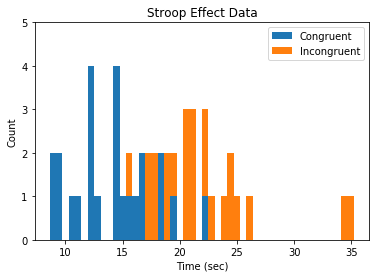

In [5]:
### a histogram for the Stroop Effect data

df.plot.hist(title="Stroop Effect Data", stacked="false", bins = 48);

plt.xlabel("Time (sec)")

plt.ylabel("Count")
plt.ylim(0,5)

Text(0.5,0,'Time (sec)')

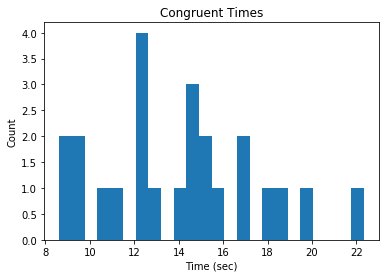

In [6]:
### the histogram for the Congruent times only

df['Congruent'].plot.hist(title="Congruent Times", bins = 24);
plt.ylabel("Count")
plt.xlabel("Time (sec)")

Text(0.5,0,'Time (sec)')

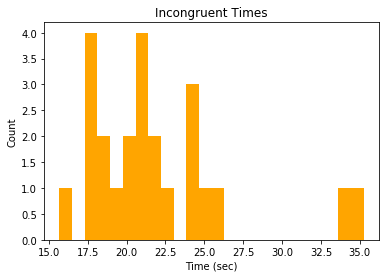

In [7]:
### the histogram for the Incongruent times only

df['Incongruent'].plot.hist(title="Incongruent Times", bins = 24, color='orange');
plt.ylabel("Count")
plt.xlabel("Time (sec)")

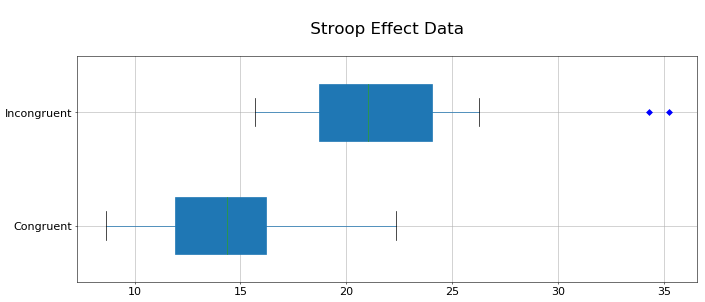

In [8]:
### boxplots for the two columns in the dataframe

### create the figure in which the chart will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

### the horizontal boxplot
df.boxplot(sym='bD', vert=False, widths=.5, patch_artist=True, showfliers=True)

### title and ticks  
plt.title('\n Stroop Effect Data \n', fontsize=24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

#### Comments:

1. The 'Congruent Times' histogram (see also the boxplot) exhibits nonzero positive skewness. The 'Incongruent Times' histogram is close to a normal distribution. 

2. The boxplots give a graphical representation of the range and intequantile range data we previously computed. We notice in the 'Incongruent' boxplot that there are two outliers.

In [9]:
### identify the two outliers we observed in the 'Incongruent' boxplot

df.sort_values(by='Incongruent', ascending=False).head(3)

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288
9,14.480,26.282


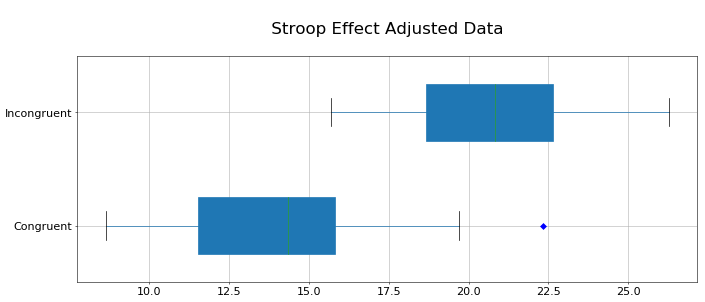

In [10]:
### remove the two outliers and replot

df1=df.drop(df.index[[14,19]])

### create the figure in which the chart will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

### the horizontal boxplot
df1.boxplot(sym='bD', vert=False, widths=.5, patch_artist=True, showfliers=True)

### title and ticks  
plt.title('\n Stroop Effect Adjusted Data \n', fontsize=24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()


*Comment*:

> There is an outlier in the 'Congruent' data, which we will leave as it is.

### (5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

#### Method I: use a built-in Python to perform a t-test on the sample 

We perform a one tailed T-test for the means of two the independent samples of recorded reading times. We assume that the variances are different.

In [11]:
### perform the t-test
t_score, p_value = stats.ttest_ind(df1['Incongruent'], df1['Congruent'], axis=0, equal_var=False)

### print the results
print(' t-score = {}.'. format(t_score))

### adjust the p-value to take into account that our t-test is a one tailed test
### while SciPy performs a two-tailed test
print(' p-value = {}.'. format(p_value / 2))

 t-score = 7.049169019899317.
 p-value = 7.921206284058749e-09.


**Conclusions I**:

> The confidence level to perform the hypothesis testing is chosen to $95 \%$ and the corresponding critical statistic value is $\alpha = 0.05$. The computed $p$-value is much smaller than the critical value, so we reject the null hypothesis in the favor of the alternative hypothesis. Based on these results the average time to read the words in 'Incongruent' conditions is longer than the average time needed to read in 'Congruent' conditions. 

#### Method II: perform an A/B test on a simulated sampling distribution

In [12]:
### create a new column that contains the difference
### between the 'Incongruent' and 'Congruent' times

df1['Difference'] = df1['Incongruent'] - df1['Congruent']

### check for success
df1.head(2)

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950


In [13]:
### compute the observed difference of average times 

obs_diff = df1['Difference'].mean()

print('The observed difference in the conversion rates is {}.'.format(round(obs_diff,4)))

The observed difference in the conversion rates is 6.9173.


**Comments**: 

> For this experiment, the observed difference supports our alternative hypothesis. Now that we know the difference for this sample, let's see if the difference is significant and not due to chance. We bootstrap the sample to simulate the sampling distribution for the differences.

In [14]:
### create a sample of the size of our data

sample_data = df1.sample(22)

In [15]:
### simulate 10,000 results using bootstrapping and store them in diffs

diffs = []

for _ in range(10000):
    ### create the bootsample of the size of our data
    bootsample = sample_data.sample(df1.shape[0], replace = True)
    ### compute the mean values for the bootsample
    cong_mean = bootsample['Congruent'].mean()
    incong_mean = bootsample['Incongruent'].mean()
    ### append the data 
    diffs.append(incong_mean - cong_mean)   

Text(0.5,1,'\n Simulated differences\n')

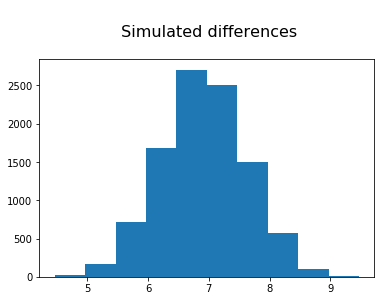

In [16]:
#### the histogram of the simulated differences

plt.hist(diffs);

### the title
plt.title('\n Simulated differences\n', fontsize=16)

*Comment*:

> According to the Central Limit Theorem the sampling distribution is normal. We can use it to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.

In [17]:
### to simulate for the null, create a normal distribution centered at 0
### with the same standard deviation as our sampling distribution

diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

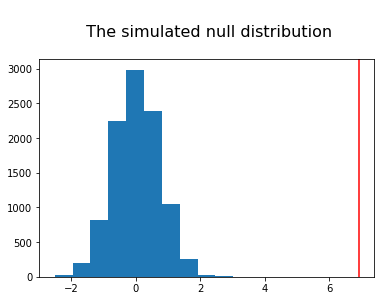

In [18]:
### the histogram of the sampling distribution simulated under the null hypothesis
plt.hist(null_vals);

### the title
plt.title('\n The simulated null distribution\n', fontsize=16)

### where our observed statistic falls
plt.axvline(x=obs_diff, color='red');

We compute the $p$-value for our statistic by finding the proportion of values in the null distribution that are greater than our observed difference. 

In [19]:
### the p-value

(null_vals > obs_diff).mean()

0.0

**Conclusions II**:

> If we compare with a critical value $\alpha = 0.05$, we can conclude with $95 \%$ confidence level that the time difference for the 'Congruent' and 'Incongruent' groups does appear to be significant. We can reject the null hypothesis. Therefore the time needed in 'Incongruent' conditions is longer than the reading time in 'Congruent' conditions.

**Final comment**:

> The similar results obtained with the two tests match my expectations and are in accordance with the Stroop Effect theory.

### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The Stroop effect is observed when an individual has to replace a habitual response with a controlled response. Stroop tests are widely used in psychology to measure the interference in the reaction time of a task and in order to evaluate various cognitive skills [8].

There are several variations of the Stroop effect that can be found in the literature. A few examples are given below:

- The Emotional Stroop Task [4], uses target and control lists of words printed in various colors of ink, where the words on the target list have an emotional component (for example they are anxiety-related if the study is about anxiety).

- The Stroop Task [4] in which the participants are instructed to name the color of items presented on screen by pressing a corresponding key on the keyboard.

- Another variation of the Stroop Task is to ask participants to name a number based on the number word versus the number of times a word is printed.



### References:

1. D.D. Wackerly, W. Mendenhall III, R.L. Scheaffer, Mathematical Statistics with Applications, Thomson Learning Inc., 2008.

2. https://quizlet.com/72519003/stroop-effect-flash-cards/

3. https://en.wikipedia.org/wiki/Stroop_effect

4. https://www.sciencedirect.com/topics/neuroscience/stroop-effect

5. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

6. https://github.com/SolanaO/dand_t1_p4

7. https://classroom.udacity.com/nanodegrees/nd002/parts/682048c9-4e1a-4020-8a47-7eaf3e34f0fe

8. http://imbs.uci.edu/~kjameson/ECST/MacLeod_TheStroopEffect.pdf